 shailesh choubey's titanic prediction project

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(rc={'figure.figsize': (12,10)})

import warnings
warnings.filterwarnings('ignore')

In [ ]:
import random
random.seed(101)

In [26]:
data = pd.read_csv("/content/Titanic-Dataset.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
dict_live = {
    0: 'Died',
    1: 'Survived'
}

dict_sex = {
    'male': 0,
    'female': 1
}

data['Bsex'] = data['Sex'].apply(lambda x: dict_sex[x])

# features
features = data[['Pclass', 'Bsex']].to_numpy()
labels = data['Survived'].to_numpy()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size=0.30, random_state=0)

In [ ]:
# Sigmoid
def Sigmoid(x, derivative=False):
    if derivative == True:
        f = 1/(1 + np.exp(-x)) * (1 - 1/(1 + np.exp(-x)))
    else:
        f = 1/(1 + np.exp(-x))

    return f

# ReLU
def ReLU(x, derivative=False):
    if derivative == True:
        f = np.heaviside(x, 1)
    else:
        f = np.maximum(x, 0)

    return f

In [ ]:
def train_ANN(X_train, Y_train, h1_units=4, h2_units=4, learning_rate=0.0015):
    random.seed(101)

    # hidden layer 1
    w1 = 2*np.random.rand(h1_units, X_train.shape[1])
    b1 = np.random.rand(h1_units)

    # hidden layer 2
    w2 = 2*np.random.rand(h2_units, h1_units)
    b2 = np.random.rand(h2_units)

    # output layer
    w_out = 2 * np.random.rand(h2_units)
    b_out = np.random.rand(1)

    loss = []
    vec_y = []
    for i in range(0, X_train.shape[0]):
        x_data = X_train[i]

        # Forward Propagation
        h1 = ReLU(np.dot(w1, x_data) + b1)
        h2 = ReLU(np.dot(w2, h1) + b2)
        y = Sigmoid(np.dot(w_out, h2) + b_out)

        # Back Propagation
        delta_out = (y - Y_train[i]) * Sigmoid(y, derivative=True)
        delta_2 = delta_out * w_out * ReLU(h2, derivative=True)
        delta_1 = np.dot(delta_2, w2) * ReLU(h1, derivative=True)

        # Gradient Descent
        w_out = w_out - learning_rate * delta_out * h2
        b_out = b_out - learning_rate * delta_out

        # hidden layer 2
        w2 = w2 - learning_rate * np.kron(delta_2, h1).reshape(h2_units, h1_units)
        b2 = b2 - learning_rate * delta_2

        # hidden layer 1
        w1 = w1 - learning_rate * np.kron(delta_1, x_data).reshape(h1_units, x_data.shape[0])
        b1 = b1 - learning_rate * delta_1

        # cost
        loss.append((1/2) * (y - Y_train[i])**2)
        vec_y.append(y[0])

    batch_loss = []
    for i in range(0, 10):
        loss_avg = 0
        for m in range(0, 60):
            loss_avg += vec_y[60*i + m]/60
        batch_loss.append(loss_avg)
        plt.figure(figsize=(10,6))
    plt.plot(np.arange(1, len(batch_loss)+1), batch_loss)
    plt.title('Average Loss by Epoch', fontsize=20)
    plt.xlabel('Epoch', fontsize=16)
    plt.ylabel('Loss', fontsize=16)
    plt.show()

    return w1, b1, w2, b2, w_out, b_out, loss


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

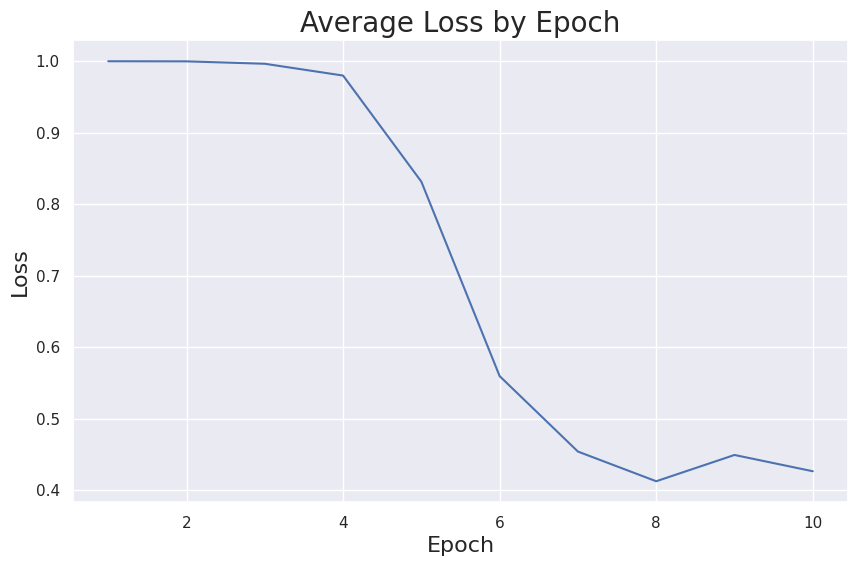

In [ ]:
w1, b1, w2, b2, w_out, b_out, loss = train_ANN(X_train, Y_train)

In [ ]:
def ANN_pred(X_test, w1, b1, w2, b2, w_out, b_out):
    pred = []

    for i in range(0, X_test.shape[0]):
        x = X_test[i]

        # Forward Propagation
        z1 = ReLU(np.dot(w1, x) + b1)
        z2 = ReLU(np.dot(w2, z1) + b2)
        y = Sigmoid(np.dot(w_out, z2) + b_out)

        pred.append(np.heaviside(y-0.5, 1)[0])

    return np.array(pred)

In [ ]:
predictions = ANN_pred(X_test, w1, b1, w2, b2, w_out, b_out)

In [ ]:
predictions

array([0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0.,
       1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1.,
       0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0.,
       1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1.,
       1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1.,
       0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0.,
       1., 1., 0., 1., 0.

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

cm = confusion_matrix(Y_test, predictions)

df_cm = pd.DataFrame(cm, index = [dict_live[i] for i in range(0,2)],
                         columns= [dict_live[i] for i in range(0,2)])

In [ ]:
df_cm

,Died,Survived
Died,91,77
Survived,14,86


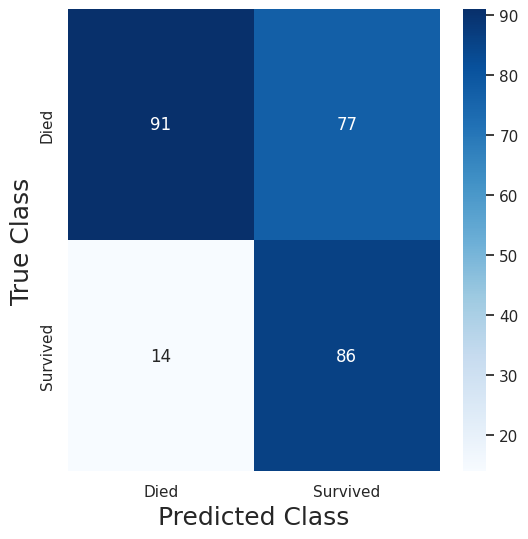

In [ ]:
plt.figure(figsize=(6,6))
sns.heatmap(df_cm, annot=True, cmap=plt.cm.Blues, fmt='g')
plt.xlabel('Predicted Class', fontsize=18)
plt.ylabel('True Class', fontsize=18)
plt.show()


In [ ]:
accuracy_score(Y_test, predictions)

0.6604477611940298